In [1]:
%matplotlib inline
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 
import numpy as np 
from scipy import ndimage
import cv2
from skimage import io
from PIL import Image

# 1. Generate Contour

Size of the image
(256, 256, 4)
Actual area of the shape (px)
(20, 358.306)


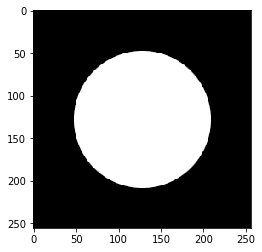

Sobel Edge Detection


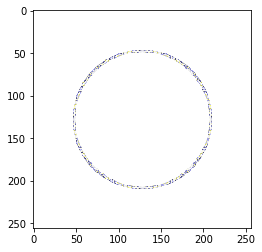

Canny Edge Detection


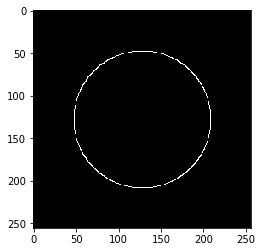

In [2]:
W =mpimg.imread('circ.png')
#Sizes
print('Size of the image')
print(W.shape)
print('Actual area of the shape (px)')
act_area= 20,358.306 #got this from GIMP
print(act_area)

plt.imshow(W)
plt.show()

print('Sobel Edge Detection')
edge_horizont = ndimage.sobel(W, 0)
edge_vertical = ndimage.sobel(W, 1)
s_edge = np.hypot(edge_horizont, edge_vertical)
plt.imshow(s_edge)
plt.show()

print('Canny Edge Detection')
T = cv2.imread('circ.png')
c_edge = cv2.Canny(T,256,256)
plt.imshow(c_edge,cmap='gray')
plt.show()


# 2. Arrange X,Y coords to increasing Theta

In [3]:
#Find edge pixel coords
ind = np.where(c_edge != [0])
#Get the centroid of the shape
    #ind[] are the pixel coords of the edges
imgx = ind[0].shape #total number of edge
imgy = ind[1].shape #            pixels
snumx = np.sum(ind[0])
snumy = np.sum(ind[1])
centx = snumx/imgx 
centy = snumy/imgy 

print('centroid: ',centx,centy)

#Subtract center of the image
centroid_x = ind[0]-centx #centroid in the x-axis
centroid_y =ind[1]-centy #centroid in the y-axis

#coords = zip(ind[0], ind[1])
#coords_list = list(coords) #just in case you wanna check the OG coords
#coords_c = zip(centroid_x,centroid_y)
#coords_c_list = list(coords_c) #coords subtracted from center

#To polar values               
r = np.sqrt(centroid_x**2+centroid_y[1]**2)
theta = np.arctan2(centroid_y,centroid_x)

#ang = zip(centroid_x,centroid_y,sort_theta) -> wrong, causes mismatching
ang = zip(centroid_x,centroid_y,theta)
ang_list = list(ang)
#For sorting list acc to increasing angle
def Theta(elem):
    return elem[2]
ang_slist = sorted(ang_list,key=Theta)
ang_slist1 = np.array(ang_slist) #turn to an array (kinda useless rn)
#print(ang_slist)
#print(max(theta))
#print(min(theta))
x_points = np.array([i[0] for i in ang_slist])
y_points = np.array([i[1] for i in ang_slist])


centroid:  [128.] [128.]


# 3. Apply Green's Theorem to get Area

In [4]:
 #FOR GREEN"S THEOREM
x_points = np.array([i[0] for i in ang_slist])
y_points = np.array([i[1] for i in ang_slist])
    
#print(x_points)
#print(y_points)
    
def Green(x,y):
    a = 0
    for i in range(len(x)-1):
        a += x[i]*y[i+1] - y[i]*x[i+1]
    return abs(a/2)
    
Area = Green(x_points,y_points) + ind[0].shape
err =  100*(Area-act_area)/(Area)
print('Calculated area of the shape: ',Area)
print('Actual are of the shape: ',act_area)
print('%error: ',err )

Calculated area of the shape:  [20872.]
Actual are of the shape:  (20, 358.306)
%error:  [99.90417785 98.28331736]


# For a square

Size of the image
(256, 256, 3)
Actual area of the shape (px)
(21, 904)


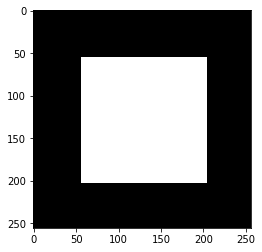

Sobel Edge Detection


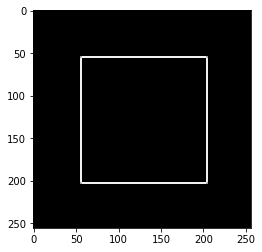

Canny Edge Detection


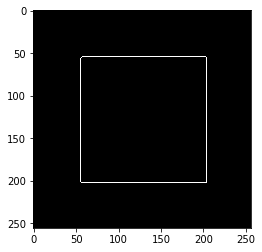

centroid:  [128.25170068] [129.25170068]
Calculated area of the shape:  [22451.87414966]
Actual are of the shape:  (21, 904)
%error:  [99.90646661 95.97361007]


In [5]:
W =mpimg.imread('squarepants.png')
#Sizes
print('Size of the image')
print(W.shape)
print('Actual area of the shape (px)')
act_area= 21,904 #got this from GIMP
print(act_area)

plt.imshow(W)
plt.show()

print('Sobel Edge Detection')
edge_horizont = ndimage.sobel(W, 0)
edge_vertical = ndimage.sobel(W, 1)
s_edge = np.hypot(edge_horizont, edge_vertical)
plt.imshow(s_edge)
plt.show()

print('Canny Edge Detection')
T = cv2.imread('squarepants.png')
c_edge = cv2.Canny(T,256,256)
plt.imshow(c_edge,cmap='gray')
plt.show()

#Find edge pixel coords
ind = np.where(c_edge != [0])
#Get the centroid of the shape
    #total number of pixels
imgx = ind[0].shape
imgy = ind[1].shape
snumx = np.sum(ind[0])
snumy = np.sum(ind[1])
centx = snumx/imgx
centy = snumy/imgy

print('centroid: ',centx,centy)

#Subtract center of the image
centroid_x = ind[0]-centx
centroid_y =ind[1]-centy

#coords = zip(ind[0], ind[1])
#coords_list = list(coords) #just in case you wanna check the OG coords
#coords_c = zip(centroid_x,centroid_y)
#coords_c_list = list(coords_c) #coords subtracted from center

#To polar values               
r = np.sqrt(centroid_x**2+centroid_y[1]**2)
theta = np.arctan2(centroid_y,centroid_x)

#ang = zip(centroid_x,centroid_y,sort_theta) -> wrong, causes mismatching
ang = zip(centroid_x,centroid_y,theta)
ang_list = list(ang)
#For sorting list acc to increasing angle
def Theta(elem):
    return elem[2]
ang_slist = sorted(ang_list,key=Theta)
ang_slist1 = np.array(ang_slist) #turn to an array (kinda useless rn)
#print(ang_slist)
#print(max(theta))
#print(min(theta))
x_points = np.array([i[0] for i in ang_slist])
y_points = np.array([i[1] for i in ang_slist])


 #FOR GREEN"S THEOREM
x_points = np.array([i[0] for i in ang_slist])
y_points = np.array([i[1] for i in ang_slist])
    
#print(x_points)
#print(y_points)
    
def Green(x,y):
    a = 0
    for i in range(len(x)-1):
        a += x[i]*y[i+1] - y[i]*x[i+1]
    return abs(a/2)
    
Area = Green(x_points,y_points) + ind[0].shape
err =  100*(Area-act_area)/(Area)
print('Calculated area of the shape: ',Area)
print('Actual are of the shape: ',act_area)
print('%error: ',err )

Size of the image
(256, 256, 3)
Actual area of the shape (px)
(17, 563)


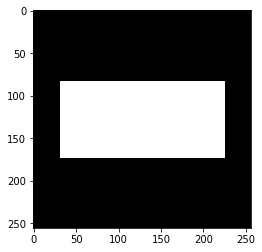

Sobel Edge Detection


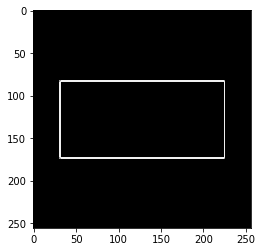

Canny Edge Detection


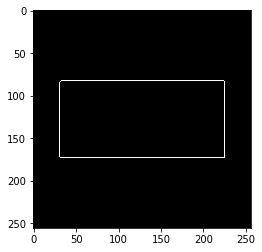

centroid:  [127.66134752] [127.84219858]
Calculated area of the shape:  [18101.16932624]
Actual are of the shape:  (17, 563)
%error:  [99.90608342 96.8897037 ]


In [6]:
W =mpimg.imread('rekt.png')
#Sizes
print('Size of the image')
print(W.shape)
print('Actual area of the shape (px)')
act_area= 17,563 #got this from GIMP
print(act_area)

plt.imshow(W)
plt.show()

print('Sobel Edge Detection')
edge_horizont = ndimage.sobel(W, 0)
edge_vertical = ndimage.sobel(W, 1)
s_edge = np.hypot(edge_horizont, edge_vertical)
plt.imshow(s_edge)
plt.show()

print('Canny Edge Detection')
T = cv2.imread('rekt.png')
c_edge = cv2.Canny(T,256,256)
plt.imshow(c_edge,cmap='gray')
plt.show()

#Find edge pixel coords
ind = np.where(c_edge != [0])
#Get the centroid of the shape
    #total number of pixels
imgx = ind[0].shape
imgy = ind[1].shape
snumx = np.sum(ind[0])
snumy = np.sum(ind[1])
centx = snumx/imgx
centy = snumy/imgy

print('centroid: ',centx,centy)

#Subtract center of the image
centroid_x = ind[0]-centx
centroid_y =ind[1]-centy

#coords = zip(ind[0], ind[1])
#coords_list = list(coords) #just in case you wanna check the OG coords
#coords_c = zip(centroid_x,centroid_y)
#coords_c_list = list(coords_c) #coords subtracted from center

#To polar values               
r = np.sqrt(centroid_x**2+centroid_y[1]**2)
theta = np.arctan2(centroid_y,centroid_x)

#ang = zip(centroid_x,centroid_y,sort_theta) -> wrong, causes mismatching
ang = zip(centroid_x,centroid_y,theta)
ang_list = list(ang)
#For sorting list acc to increasing angle
def Theta(elem):
    return elem[2]
ang_slist = sorted(ang_list,key=Theta)
ang_slist1 = np.array(ang_slist) #turn to an array (kinda useless rn)
#print(ang_slist)
#print(max(theta))
#print(min(theta))
x_points = np.array([i[0] for i in ang_slist])
y_points = np.array([i[1] for i in ang_slist])


 #FOR GREEN"S THEOREM
x_points = np.array([i[0] for i in ang_slist])
y_points = np.array([i[1] for i in ang_slist])
    
#print(x_points)
#print(y_points)
    
def Green(x,y):
    a = 0
    for i in range(len(x)-1):
        a += x[i]*y[i+1] - y[i]*x[i+1]
    return abs(a/2)
    
Area = Green(x_points,y_points) + ind[0].shape
err =  100*(Area-act_area)/(Area)
print('Calculated area of the shape: ',Area)
print('Actual are of the shape: ',act_area)
print('%error: ',err )

Size of the image
(256, 256, 3)
Actual area of the shape (px)
(10, 152.5)


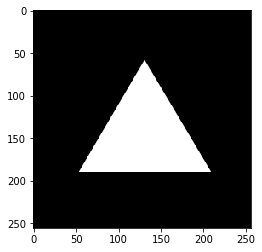

Sobel Edge Detection


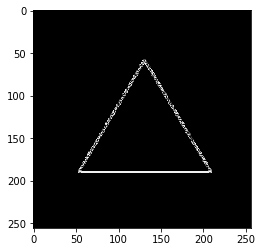

Canny Edge Detection


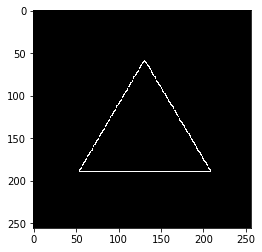

centroid:  [141.38380282] [130.88732394]
Calculated area of the shape:  [10672.80809859]
Actual are of the shape:  (10, 152.5)
%error:  [99.90630395 98.57113518]


In [7]:
W =mpimg.imread('tri.png')
#Sizes
print('Size of the image')
print(W.shape)
print('Actual area of the shape (px)')
act_area= 10,152.5
#b = 155 , h = 131
#got this from GIMP
print(act_area)

plt.imshow(W)
plt.show()

print('Sobel Edge Detection')
edge_horizont = ndimage.sobel(W, 0)
edge_vertical = ndimage.sobel(W, 1)
s_edge = np.hypot(edge_horizont, edge_vertical)
plt.imshow(s_edge)
plt.show()

print('Canny Edge Detection')
T = cv2.imread('tri.png')
c_edge = cv2.Canny(T,256,256)
plt.imshow(c_edge,cmap='gray')
plt.show()

#Find edge pixel coords
ind = np.where(c_edge != [0])
#Get the centroid of the shape
    #total number of pixels
imgx = ind[0].shape
imgy = ind[1].shape
snumx = np.sum(ind[0])
snumy = np.sum(ind[1])
centx = snumx/imgx
centy = snumy/imgy

print('centroid: ',centx,centy)

#Subtract center of the image
centroid_x = ind[0]-centx
centroid_y =ind[1]-centy

#coords = zip(ind[0], ind[1])
#coords_list = list(coords) #just in case you wanna check the OG coords
#coords_c = zip(centroid_x,centroid_y)
#coords_c_list = list(coords_c) #coords subtracted from center

#To polar values               
r = np.sqrt(centroid_x**2+centroid_y[1]**2)
theta = np.arctan2(centroid_y,centroid_x)

#ang = zip(centroid_x,centroid_y,sort_theta) -> wrong, causes mismatching
ang = zip(centroid_x,centroid_y,theta)
ang_list = list(ang)
#For sorting list acc to increasing angle
def Theta(elem):
    return elem[2]
ang_slist = sorted(ang_list,key=Theta)
ang_slist1 = np.array(ang_slist) #turn to an array (kinda useless rn)
#print(ang_slist)
#print(max(theta))
#print(min(theta))
x_points = np.array([i[0] for i in ang_slist])
y_points = np.array([i[1] for i in ang_slist])


 #FOR GREEN"S THEOREM
x_points = np.array([i[0] for i in ang_slist])
y_points = np.array([i[1] for i in ang_slist])
    
#print(x_points)
#print(y_points)
    
def Green(x,y):
    a = 0
    for i in range(len(x)-1):
        a += x[i]*y[i+1] - y[i]*x[i+1]
    return abs(a/2)
    
Area = Green(x_points,y_points) + ind[0].shape
err =  100*(Area-act_area)/(Area)
print('Calculated area of the shape: ',Area)
print('Actual are of the shape: ',act_area)
print('%error: ',err )

# Now, I'll use my favorite historical site and get its area

## The Acropolis in Athens, Greece that houses the Parthenon

Size of the image
(768, 1366, 4)
Actual area of the shape (px)
(30, 400)


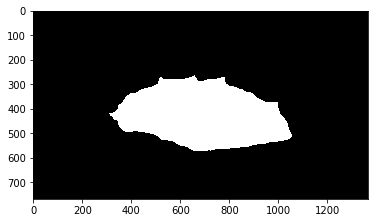

Sobel Edge Detection


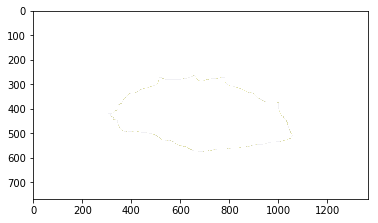

Canny Edge Detection


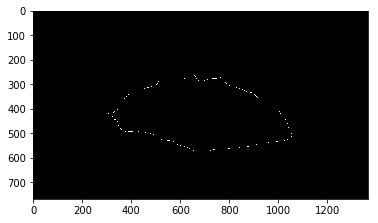

centroid:  [425.56962025] [683.71326362]
Calculated area of the shape:  [154250.21518987]
Actual area of the shape:  (30, 400)  m
Pixel conversion to sq. m.:  [33682.02794783]


In [8]:
W =mpimg.imread('acropolis_outline.png')
#Sizes
print('Size of the image')
print(W.shape)
print('Actual area of the shape (px)')
act_area= 30,400 #got this from GIMP
print(act_area)

plt.imshow(W)
plt.show()

print('Sobel Edge Detection')
edge_horizont = ndimage.sobel(W, 0)
edge_vertical = ndimage.sobel(W, 1)
s_edge = np.hypot(edge_horizont, edge_vertical)
plt.imshow(s_edge)
plt.show()

print('Canny Edge Detection')
T = cv2.imread('acropolis_outline.png')
c_edge = cv2.Canny(T,256,256)
plt.imshow(c_edge,cmap='gray')
plt.show()

#Find edge pixel coords
ind = np.where(c_edge != [0])
#Get the centroid of the shape
    #total number of pixels
imgx = ind[0].shape
imgy = ind[1].shape
snumx = np.sum(ind[0])
snumy = np.sum(ind[1])
centx = snumx/imgx
centy = snumy/imgy

print('centroid: ',centx,centy)

#Subtract center of the image
centroid_x = ind[0]-centx
centroid_y =ind[1]-centy

#coords = zip(ind[0], ind[1])
#coords_list = list(coords) #just in case you wanna check the OG coords
#coords_c = zip(centroid_x,centroid_y)
#coords_c_list = list(coords_c) #coords subtracted from center

#To polar values               
r = np.sqrt(centroid_x**2+centroid_y[1]**2)
theta = np.arctan2(centroid_y,centroid_x)

#ang = zip(centroid_x,centroid_y,sort_theta) -> wrong, causes mismatching
ang = zip(centroid_x,centroid_y,theta)
ang_list = list(ang)
#For sorting list acc to increasing angle
def Theta(elem):
    return elem[2]
ang_slist = sorted(ang_list,key=Theta)
ang_slist1 = np.array(ang_slist) #turn to an array (kinda useless rn)
#print(ang_slist)
#print(max(theta))
#print(min(theta))
x_points = np.array([i[0] for i in ang_slist])
y_points = np.array([i[1] for i in ang_slist])


 #FOR GREEN"S THEOREM
x_points = np.array([i[0] for i in ang_slist])
y_points = np.array([i[1] for i in ang_slist])
    
#print(x_points)
#print(y_points)
    
def Green(x,y):
    a = 0
    for i in range(len(x)-1):
        a += x[i]*y[i+1] - y[i]*x[i+1]
    return abs(a/2)
    
Area = Green(x_points,y_points) + ind[0].shape
# 107 pixels per 50 m
print('Calculated area of the shape: ',Area)
print('Actual area of the shape: ',act_area,' m')
print('Pixel conversion to sq. m.: ', Area*(50**2)/107**2)